## Classification Models Using Car Evaluation Data Set

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [4]:
# add a feature name
columns = ['Buying', 'Maintainance', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Condition']


In [5]:
df = pd.read_csv('car.data', names=columns)
df.head()

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety,Condition
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Perform an EDA on the dataset

* shape
* dtype
* descibe
* info
* corr

* count of cars by buying Price (column chart)
* count of cars by maintainance
* count of cars by number of doors
* count of cars by number of person
* count of cars by lug_boot
* count of cars by safety
* Distribution of condition

In [7]:
df.shape

(1728, 7)

In [23]:
df.dtypes

Buying          object
Maintainance    object
Doors           object
Persons         object
Lug_boot        object
Safety          object
Condition       object
dtype: object

In [21]:
df.describe()

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety,Condition
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Buying        1728 non-null   object
 1   Maintainance  1728 non-null   object
 2   Doors         1728 non-null   object
 3   Persons       1728 non-null   object
 4   Lug_boot      1728 non-null   object
 5   Safety        1728 non-null   object
 6   Condition     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [20]:
df.corr()

""


In [18]:
df.count()

Buying          1728
Maintainance    1728
Doors           1728
Persons         1728
Lug_boot        1728
Safety          1728
Condition       1728
dtype: int64

In [26]:
df.columns

Index(['Buying', 'Maintainance', 'Doors', 'Persons', 'Lug_boot', 'Safety',
       'Condition'],
      dtype='object')

In [27]:
df.Buying.value_counts().reset_index().rename(columns={'index':'Buying', 'Buying':'Count'})

,Buying,Count
0,vhigh,432
1,high,432
2,med,432
3,low,432


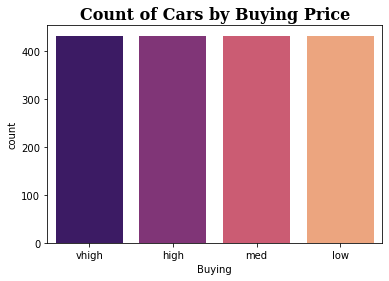

In [33]:
sns.countplot(data = df, x = 'Buying', palette='magma')
title_font = {
    'family':'Serif',
    'size': 16,
    'weight': 'bold'
}
plt.title('Count of Cars by Buying Price', fontdict= title_font)
plt.show()

In [42]:
count_of_maintainance = df.Maintainance.value_counts().reset_index().rename(columns={'index':'Maintainance', 'Maintainance':'Count'})

In [45]:
count_of_maintainance

,Maintainance,Count
0,vhigh,432
1,high,432
2,med,432
3,low,432


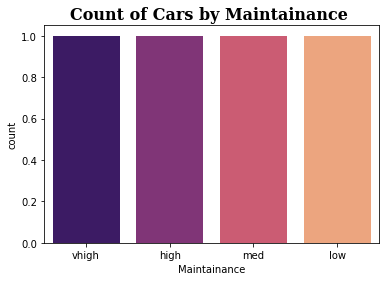

In [44]:
sns.countplot(data = count_of_maintainance, x = 'Maintainance', palette='magma')
title_font = {
    'family':'Serif',
    'size': 16,
    'weight': 'bold'
}
plt.title('Count of Cars by Maintainance ', fontdict= title_font)
plt.show()

In [48]:
count_by_numbers_of_doors= df.Doors.value_counts().reset_index().rename(columns={'index':'Doors', 'Doors':'Count'})
count_by_numbers_of_doors

,Doors,Count
0,2,432
1,3,432
2,4,432
3,5more,432


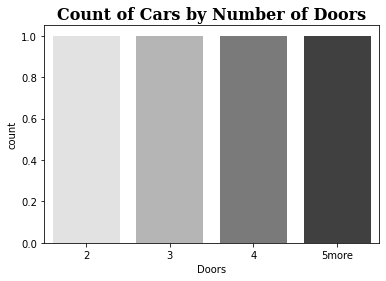

In [52]:
sns.countplot(data = count_by_numbers_of_doors, x = 'Doors', palette='Greys')
title_font = {
    'family':'Serif',
    'size': 16,
    'weight': 'bold'
}
plt.title('Count of Cars by Number of Doors', fontdict= title_font)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


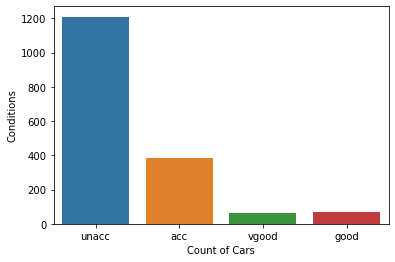

In [53]:
sns.countplot(df['Condition'])
plt.xlabel("Count of Cars")
plt.ylabel("Conditions")
plt.show()

## Data Preprocessing

In [54]:
df.head()

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety,Condition
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [56]:
df['Buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

### Label Encoding

In [59]:
from  sklearn.preprocessing import LabelEncoder

In [60]:
# create an obj
le = LabelEncoder()

In [61]:
cols =  list(df.columns)
cols

['Buying',
 'Maintainance',
 'Doors',
 'Persons',
 'Lug_boot',
 'Safety',
 'Condition']

In [62]:
for i in cols:
    df[i] = le.fit_transform(df[i])

In [63]:
df.head()

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety,Condition
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [65]:
df['Buying'].unique()

array([3, 0, 2, 1])

### Split Data - Train and Test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.iloc[:,0:6]
X

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [71]:
X.shape

(1728, 6)

In [69]:
y = df.iloc[:,-1]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Condition, dtype: int32

In [70]:
y.shape

(1728,)

In [73]:
# To reshape you need to turn it to a numpy array first
y= np.array(y).reshape((1728,1))
y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [3]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [75]:
X_train.shape

(1382, 6)

In [76]:
X_test.shape

(346, 6)

In [77]:
y_train.shape

(1382, 1)

In [78]:
y_test.shape

(346, 1)

## Machine Learning Model

### KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [80]:
knn = KNeighborsClassifier(n_neighbors=1)

In [86]:
knn.fit(X_train, y_train) # training the data

prediction = knn.predict(X_test)
prediction

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2,

In [94]:
#lets try Example [3,3,3,2,2,1]
test_data = np.array([3,3,3,2,2,1]).reshape((1,6))

In [95]:
knn.predict(test_data)

array([2])

In [102]:
print(f"KNN accuracy is: {round(accuracy_score(y_test,prediction)*100,2)} %")

KNN accuracy is: 82.37 %


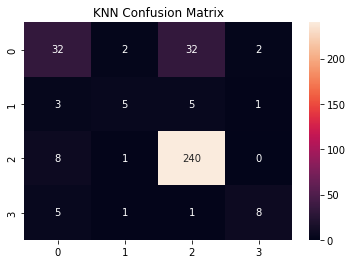

In [105]:
plt.title('KNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='g')
plt.show()

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
nb =  GaussianNB()
nb.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [108]:
nb_pred = nb.predict(X_test)

In [109]:
nb_pred

array([2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0, 3, 2, 3,
       3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 3, 0, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3,
       0, 3, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 3, 0, 2, 3, 3, 0, 2, 2,
       3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 0,
       2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2,
       2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2,
       0, 2, 2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 0, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2,

In [110]:
print(f"KNN accuracy is: {round(accuracy_score(y_test,nb_pred)*100,2)} %")

KNN accuracy is: 65.61 %


## Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf = RandomForestClassifier(n_estimators=100)

In [113]:
rf.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Temp/ipykernel_1792/2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [114]:
rf_pred = rf.predict(X_test)

In [115]:
rf_pred

array([2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       0, 3, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 3, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1,
       0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 3, 2, 3, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2,

In [116]:
print(f"KNN accuracy is: {round(accuracy_score(y_test,rf_pred)*100,2)} %")

KNN accuracy is: 97.98 %
